#Image Processing Assignment 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Q1. Add gaussian noise to the grayscale image (cameraman.tif ) with the following parameters:
#####(a) Mean 0, variance 0.01
#####(b) Mean 0, variance 0.02
#####(c) Mean 0, variance 0.05
#####(d) Mean 0, variance 0.1
Perform Image Averaging

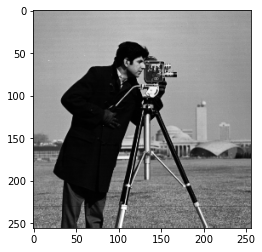

In [4]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [5]:
def addGauss(mean, var, img):
  noisy_img = img + np.random.normal(mean, np.sqrt(var), img.shape)
  return np.clip(noisy_img, 0, 255)

[(0, 0.01), (1, 0.02), (2, 0.05), (3, 0.1)]


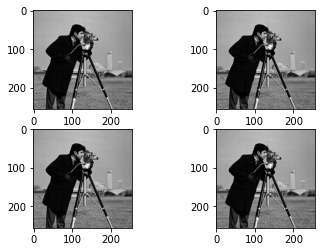

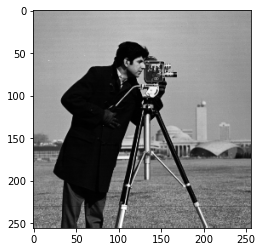

In [6]:
mean = 0
avg_img = np.zeros(img.shape)
fig = plt.figure()
print(list(enumerate([0.01, 0.02, 0.05, 0.1])))
for (i, var) in list(enumerate([0.01, 0.02, 0.05, 0.1])):
  plt.subplot(2, 2, i+1)
  plt.imshow(addGauss(mean, var, img), cmap='gray')
  avg_img = avg_img + addGauss(mean, var, img) / 4
fig = plt.figure()
plt.imshow(avg_img, cmap='gray')

### Q1. Read cameraman image, create a dark image with it (It will appear as a very dark version of the cameraman image).
##### (a) Compute the histogram of the original image.
##### (b) Compute the histogram of the dark image.
##### (c)  Apply histogram equalization on the dark image.
Compare the results.

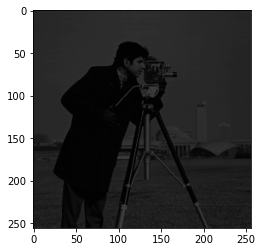

In [7]:
dark_img = np.uint8(img/4)
plt.figure()
plt.imshow(dark_img, cmap='gray', vmin=0, vmax=255)

Dark image when image is divided by 4 and rounded

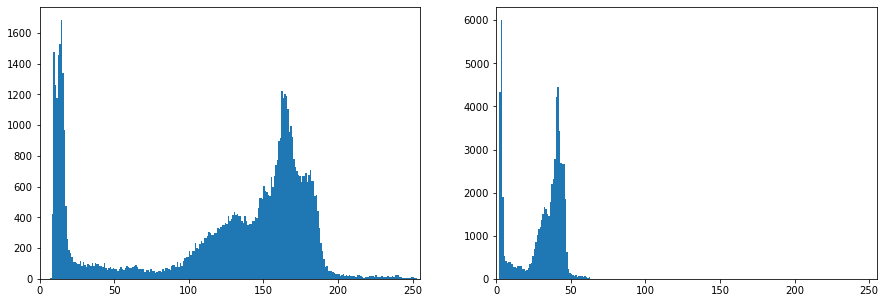

In [8]:
fig = plt.figure(figsize=(15, 5))
vals = img.flatten()
# plot histogram with 255 bins
plt.subplot(1, 2, 1)
b, bins, patches = plt.hist(vals, bins=range(256))
plt.xlim([0,255])
vals = dark_img.flatten()
# plot histogram with 255 bins
plt.subplot(1, 2, 2)
b, bins, patches = plt.hist(vals, bins=range(256))
plt.xlim([0,255])

plt.show()

Histogram plot of original and the dark image

In [9]:
hist, _ = np.histogram(dark_img.flatten(), bins=range(257))
pdf = hist / (256 ** 2)

Finding the histogram frequencies and calculating the probability density function

In [10]:
cdf = np.zeros(257)
for i in range(256):
  cdf[i] = cdf[i-1] + pdf[i]
  cdf[i] = 1 if cdf[i] > 1 else cdf[i]
cdf = cdf * 255
cdf = np.floor(cdf)

Calculating the cummulative distribution function and scaling it to 256, then flooring it

[[162. 162. 162. ... 142. 151. 151.]
 [179. 151. 162. ... 151. 151. 151.]
 [162. 162. 162. ... 142. 151. 151.]
 ...
 [ 87. 115.  97. ... 115. 121.  87.]
 [ 97. 103. 109. ... 115. 109.  87.]
 [ 97. 103. 109. ... 115. 109.  87.]]


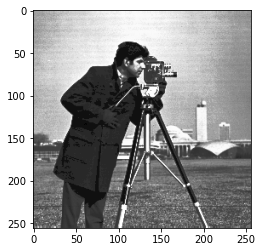

In [11]:
new_image = np.zeros(img.shape)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    new_image[i, j] = cdf[dark_img[i, j]]  
print(new_image)
plt.imshow(new_image, cmap = 'gray')

In [12]:
plt.figure(figsize=[10, 6])
plt.subplot(1, 3, 1)
plt.imshow(new_img, cmap='gray', vmax=255)
plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(dark_img, cmap='gray', vmax=255)

NameError: name 'new_img' is not defined

Histogram equalization equalized the contrast of the dark image to bring it similar to the original image

In [172]:
def avgFilter(img):
  mask = np.ones([3, 3], dtype=int)/9
  avg_image = np.zeros(img.shape)
  for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      for p in range(-1, 2):
        for q in range(-1, 2):
          avg_image[i, j] = avg_image[i, j] + img[i+p, j+q] * mask[p, q]
  plt.imshow(avg_image, cmap='gray', vmax=255)

Average filter that takes the average of the 3x3 block for a particular pixel

In [173]:
def medFilter(img):
  med_image = np.zeros(img.shape)
  for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      temp = []
      for p in range(-1, 2):
        for q in range(-1, 2):
          temp = temp + [img[i+p, j+q]]
      med_image[i, j] = sorted(temp)[4]
  plt.imshow(med_image, cmap='gray', vmax=255)

Median filter that takes the median of the 3x3 block for a particular pixel

In [174]:
def minFilter(img):
  min_image = np.zeros(img.shape)
  for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      temp = []
      for p in range(-1, 2):
        for q in range(-1, 2):
          temp = temp + [img[i+p, j+q]]
      min_image[i, j] = min(temp)
  plt.imshow(min_image, cmap='gray', vmax=255)

Min filter that takes the minimum of the 3x3 block for a particular pixel

In [175]:
def maxFilter(img):
  max_image = np.zeros(img.shape)
  for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
      temp = []
      for p in range(-1, 2):
        for q in range(-1, 2):
          temp = temp + [img[i+p, j+q]]
      max_image[i, j] = max(temp)
  plt.imshow(max_image, cmap='gray', vmax=255)

Max filter that takes the maximum of the 3x3 block for a particular pixel

In [176]:
def showAll(img):
  fig = plt.figure()
  plt.subplot(2, 2, 1)
  avgFilter(img)
  plt.subplot(2, 2, 2)
  medFilter(img)
  plt.subplot(2, 2, 3)
  minFilter(img)
  plt.subplot(2, 2, 4)
  maxFilter(img)

Plots all 4 of the filtered images <br> The code below runs a menu driven program that lets the user choose which filter to run on image "img"

MENU:
Choose your filter
1. Mean filter
2. Median filter
3. Min filter
4. Max filter
5. Show All
6. Exit
5


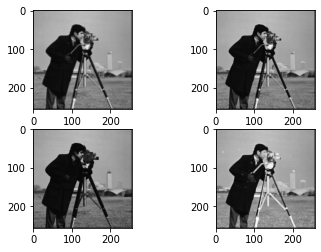

MENU:
Choose your filter
1. Mean filter
2. Median filter
3. Min filter
4. Max filter
5. Show All
6. Exit
1


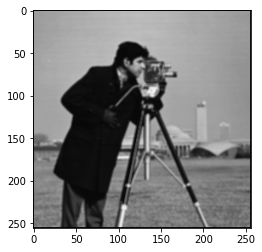

MENU:
Choose your filter
1. Mean filter
2. Median filter
3. Min filter
4. Max filter
5. Show All
6. Exit
2


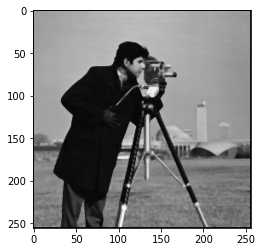

MENU:
Choose your filter
1. Mean filter
2. Median filter
3. Min filter
4. Max filter
5. Show All
6. Exit
3


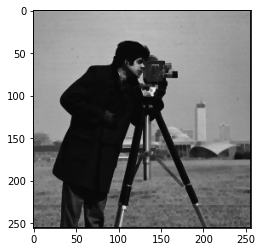

MENU:
Choose your filter
1. Mean filter
2. Median filter
3. Min filter
4. Max filter
5. Show All
6. Exit
4


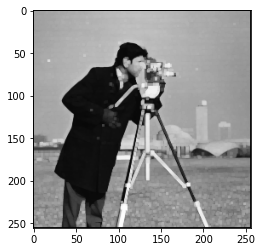

MENU:
Choose your filter
1. Mean filter
2. Median filter
3. Min filter
4. Max filter
5. Show All
6. Exit
6


In [178]:
switcher = {1: avgFilter, 2: medFilter, 3: minFilter, 4: maxFilter, 5: showAll}
while(True):
  print("MENU:\nChoose your filter\n1. Mean filter\n2. Median filter\n3. Min filter\n4. Max filter\n5. Show All\n6. Exit")
  choice = int(input())
  if choice >= 6 or choice <= 0:
    break
  switcher[choice](img)
  plt.show()